In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
file = ('adult.csv')
data = pd.read_csv(file)


In [5]:
# remove rows where occupation is unknown
data = data[data.occupation != '?']
raw_data = data[data.occupation != '?']

In [6]:
# create numerical columns representing the categorical data
data['workclass_num'] = data.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
data['over50K'] = np.where(data.income == '<=50K', 0, 1)
data['marital_num'] = data['marital.status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
data['race_num'] = data.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
data['sex_num'] = np.where(data.sex == 'Female', 0, 1)
data['rel_num'] = data.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,capital.loss,hours.per.week,native.country,income,workclass_num,over50K,marital_num,race_num,sex_num,rel_num
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,4356,18,United-States,<=50K,0,0,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,3900,40,United-States,<=50K,0,0,1,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,3900,40,United-States,<=50K,0,0,2,0,0,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,3770,45,United-States,<=50K,0,0,1,0,0,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,3770,40,United-States,<=50K,0,0,2,0,1,0


In [7]:

X = data[['workclass_num', 'education.num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital.gain', 'capital.loss']]
y = data.over50K

In [29]:
# create a base classifier used to evaluate a subset of attributes
logreg = LogisticRegression()

# create the RFE model and select 3 attributes
rfe = RFE(logreg, 4)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False  True False False False  True False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
[ 55  58  29  57  56  52  44  23  22  53  20  21  77  38  33  35  46  50
   4  37  28  34  54   1  36  31  64   1  39  27  80   1  26  17  25  30
  14 100  11  19   7   6   9   5   1  42  41  51  69  10  48  47   8   2
  24  13  16  45  43  15  49  12  18  40  99  95  96  63  72  61  84  62
  89  76  75  79  65  71 102  93  92  98  73  88  87  81  67  83  91

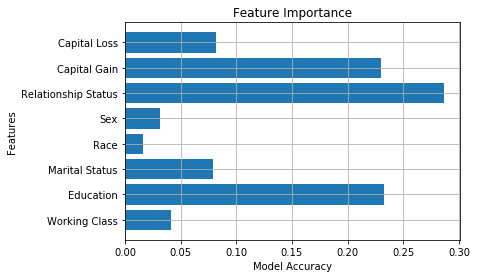

In [9]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X, y)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(8) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Working Class', 'Education', 'Marital Status', 'Race', 'Sex', 'Relationship Status', 'Capital Gain', 'Capital Loss'))
plt.grid(True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [16]:
# import
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

print('LogReg %s' % metrics.accuracy_score(y_test, y_pred))

LogReg 0.826953125


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

20 0.8533854166666667


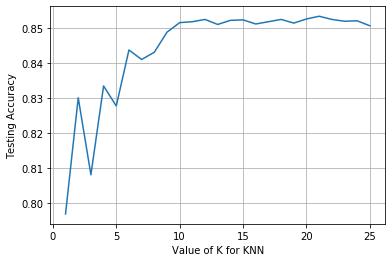

In [21]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

In [22]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8526041666666667

In [23]:
# create the numerical dummy columns for the features
dummies = pd.get_dummies(raw_data)

# del either the greater than 50K feature or less than 50K feature
del dummies['income_<=50K']
dummy_data = dummies.values

# shape the features and response 
X = dummy_data[:, :-1]
y = dummy_data[:, -1]
print(X.shape, y.shape)

# fit
gbc = GradientBoostingClassifier().fit(X_train, y_train)

print('GBC %s' % gbc.score(X_test, y_test))

(30718, 105) (30718,)
GBC 0.855078125


In [25]:
#create a feature numerically representative of different capital gains catergories 
def cap_split(row):
    if row['capital.gain'] > 0 and row['over50K'] == 1:
        return 1
    elif row['capital.gain'] > 0 and row['over50K'] == 0:
        return 2
    elif row['capital.gain'] <= 0 and row['over50K'] == 1:
        return 3
    else:
        return 4
    
data['cap_split'] = data.apply (lambda row: cap_split (row), axis=1)

In [26]:
# def that will display the percentage and absolute value on the pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

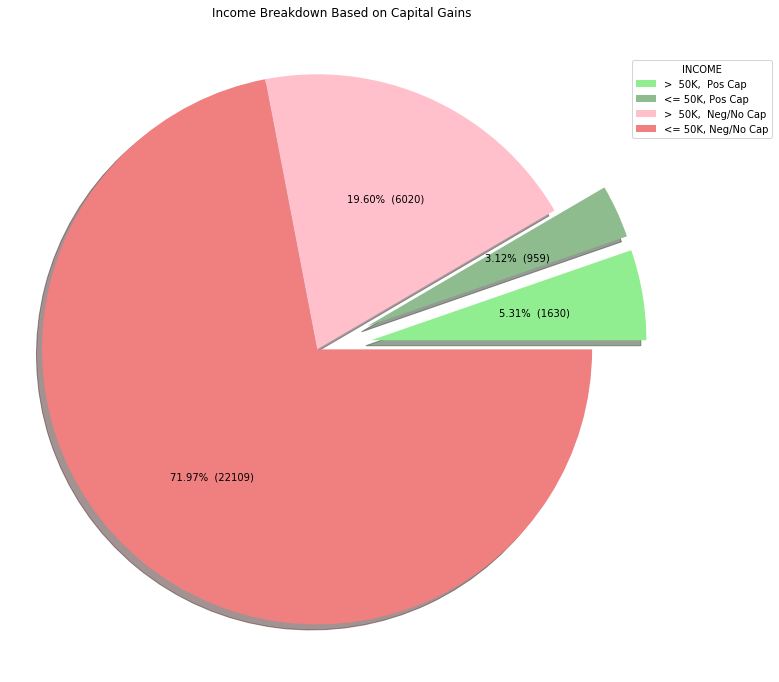

In [27]:
# pie chart displaying breakdown of all types of cap in relation to making over 50K
cap_split = data.cap_split.value_counts().sort_index()
colors = ['lightgreen', 'darkseagreen', 'pink', 'lightcoral']
explode = [0.2, 0.2, 0, 0]
label = ['>  50K,  Pos Cap', '<= 50K, Pos Cap', '>  50K,  Neg/No Cap', '<= 50K, Neg/No Cap']
fig = plt.figure(figsize=(12, 12)) 
ax = fig.add_subplot(1, 1, 1)
plt.pie(cap_split, shadow=True, colors=colors, explode=explode, autopct=make_autopct(cap_split))
plt.title('Income Breakdown Based on Capital Gains')
plt.axis('equal')
plt.legend(label, title='INCOME', bbox_to_anchor=(1.15, .95))

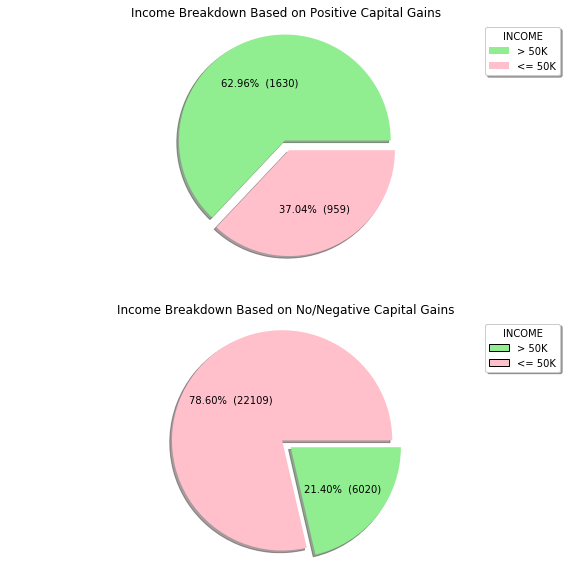

In [28]:
# pie charts separating the Pos Capital Gains vs. the Neg/No Capital Gains
import matplotlib.patches as mpatches
%matplotlib inline

caphigh = data[data['capital.gain'] > 0]
caplow = data[data['capital.gain'] <= 0]

caphigh_val = caphigh.over50K.value_counts()
caplow_val = caplow.over50K.value_counts()
colors1 = ['lightgreen', 'pink']
colors2 = ['pink', 'lightgreen']

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
plt.pie(caphigh_val, shadow=True, explode=[0.1, 0], colors=colors1, autopct=make_autopct(caphigh_val))
plt.axis('equal')
plt.title('Income Breakdown Based on Positive Capital Gains')
plt.legend(labels=['> 50K', '<= 50K'], frameon=True, shadow=True, title='INCOME')

ax2 = fig.add_subplot(2, 1, 2)
plt.pie(caplow_val, shadow=True, explode=[0.1, 0], colors=colors2, autopct=make_autopct(caplow_val))
plt.axis('equal')
plt.title('Income Breakdown Based on No/Negative Capital Gains')
ax2_patch1 = mpatches.Patch(facecolor='lightgreen',  edgecolor='black', label='> 50K')
ax2_patch2 = mpatches.Patch(facecolor='pink',  edgecolor='black', label='<= 50K')
plt.legend(handles=[ax2_patch1, ax2_patch2], frameon=True, shadow=True, title='INCOME')

plt.show()